<a href="https://colab.research.google.com/github/saturnsz/SingleLayer-JST/blob/main/SingleLayerJST4(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# ==============================
# Activation Function
# ==============================
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def sigmoid_derivative(x):
    return x * (1 - x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


In [3]:
# ==============================
# Single Layer Perceptron
# ==============================
class SingleLayerPerceptron:
    def __init__(self, input_dim, learning_rate=0.05,
                 init_method="xavier", activation="sigmoid", seed=42):

        np.random.seed(seed)

        # === Inisialisasi Bobot ===
        if init_method == "xavier":
            limit = np.sqrt(6 / input_dim)
            self.weights = np.random.uniform(-limit, limit, (input_dim, 1))
        elif init_method == "he":
            self.weights = np.random.randn(input_dim, 1) * np.sqrt(2 / input_dim)
        elif init_method == "normal":
            self.weights = np.random.randn(input_dim, 1) * 0.01
        else:
            self.weights = np.random.rand(input_dim, 1) * 0.01

        self.bias = np.zeros((1,))
        self.learning_rate = learning_rate
        self.init_method = init_method
        self.act_name = activation
        self.seed = seed

        # === Activation ===
        if activation == "sigmoid":
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        else:
            self.activation = relu
            self.activation_derivative = relu_derivative

    # Forward
    def forward(self, X):
        self.z = np.dot(X, self.weights) + self.bias
        self.a = self.activation(self.z)
        return self.a

    # Backprop
    def backward(self, X, y, output):
        m = X.shape[0]
        dz = output - y
        dw = np.dot(X.T, dz) / m
        db = np.sum(dz) / m

        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    # Training
    def train(self, X, y, epochs=80, batch_size=32):
        self.loss_history = []
        self.acc_history = []

        for epoch in range(epochs):
            for i in range(0, X.shape[0], batch_size):
                Xb = X[i:i+batch_size]
                yb = y[i:i+batch_size]
                out = self.forward(Xb)
                self.backward(Xb, yb, out)

            out = self.forward(X)
            loss = np.mean(-(
                y * np.log(out + 1e-8) +
                (1 - y) * np.log(1 - out + 1e-8)
            ))
            acc = np.mean((out > 0.5).astype(int) == y) * 100

            self.loss_history.append(loss)
            self.acc_history.append(acc)

        return self.loss_history, self.acc_history

    # Evaluasi
    def evaluate(self, X, y):
        out = self.forward(X)
        pred = (out > 0.5).astype(int)
        return np.mean(pred == y) * 100


In [4]:
# ---------------------
# 1. Load dataset
# ---------------------
df_train = pd.read_excel("/content/drive/MyDrive/train_data_eps1.xlsx")
df_test = pd.read_excel("/content/drive/MyDrive/test_data_ eps1 (1).xlsx")


In [5]:
# ---------------------
# 2. Pra-pemrosesan
# ---------------------
df_train.fillna(df_train.mean(numeric_only=True), inplace=True)
df_test.fillna(df_test.mean(numeric_only=True), inplace=True)

# Identify numerical features only for scaling
numeric_features = df_train.select_dtypes(include=np.number).columns.drop(df_train.columns[-1])
target = df_train.columns[-1]

X_train = df_train[numeric_features].values
y_train = df_train[target].values.reshape(-1, 1)

X_test = df_test[numeric_features].values
y_test = df_test[target].values.reshape(-1, 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

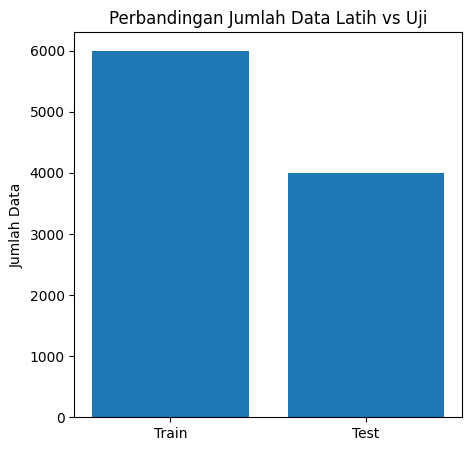

In [6]:
# ------------------------------
# 3. Chart Jumlah Data Train vs Test
# ------------------------------
plt.figure(figsize=(5,5))
plt.bar(["Train", "Test"], [len(X_train), len(X_test)])
plt.title("Perbandingan Jumlah Data Latih vs Uji")
plt.ylabel("Jumlah Data")
plt.show()

In [8]:
# ------------------------------
# 4. Print Tahap Pra-pemrosesan
# ------------------------------
print("\n=== Tahap Pra-Pemrosesan Data ===")
print("• Mengisi missing value: Mean Imputation")
print(f"• Jumlah fitur dipakai: {len(numeric_features)} kolom")
print("• Target:", target)
print("• Scaling: StandardScaler")
print("• Teknik Inisialisasi Bobot: Xavier")
print("• Seed Random Bobot: 123")
print("====================================\n")


=== Tahap Pra-Pemrosesan Data ===
• Mengisi missing value: Mean Imputation
• Jumlah fitur dipakai: 7 kolom
• Target: fake
• Scaling: StandardScaler
• Teknik Inisialisasi Bobot: Xavier
• Seed Random Bobot: 123



In [9]:
# ------------------------------
# 5. Baris kode pembuatan model (ditampilkan)
# ------------------------------
print("\n=== Baris Kode Pembuatan Model Perceptron ===")
print("""perceptron = SingleLayerPerceptron(
    input_dim=X_train.shape[1],
    learning_rate=0.05,
    init_method="xavier",
    activation="sigmoid",
    seed=123
)""")
print("=============================================\n")



=== Baris Kode Pembuatan Model Perceptron ===
perceptron = SingleLayerPerceptron(
    input_dim=X_train.shape[1],
    learning_rate=0.05,
    init_method="xavier",
    activation="sigmoid",
    seed=123
)



In [10]:
# ------------------------------
# 6. Buat Model
# ------------------------------
perceptron = SingleLayerPerceptron(
    input_dim=X_train.shape[1],
    learning_rate=0.05,
    init_method="xavier",
    activation="sigmoid",
    seed=123
)

perceptron.train(X_train, y_train)


([np.float64(0.26539106412921365),
  np.float64(0.22770176865194988),
  np.float64(0.21198773601936327),
  np.float64(0.20301020037615475),
  np.float64(0.19714502637219297),
  np.float64(0.1930087254492599),
  np.float64(0.1899415741779606),
  np.float64(0.18758447582141458),
  np.float64(0.18572377155409336),
  np.float64(0.18422384515661125),
  np.float64(0.18299425602326494),
  np.float64(0.1819722836695246),
  np.float64(0.18111302577076746),
  np.float64(0.18038347687426878),
  np.float64(0.17975883070810286),
  np.float64(0.17922008566957418),
  np.float64(0.1787524455287788),
  np.float64(0.1783442224058997),
  np.float64(0.17798606659950258),
  np.float64(0.17767041472863104),
  np.float64(0.1773910870844105),
  np.float64(0.17714298906553957),
  np.float64(0.1769218865584766),
  np.float64(0.17672423472152735),
  np.float64(0.17654704591618023),
  np.float64(0.17638778672582603),
  np.float64(0.17624429685576887),
  np.float64(0.17611472468114214),
  np.float64(0.175997475593

In [11]:
# ------------------------------
# 7. Evaluasi
# ------------------------------
acc_train = perceptron.evaluate(X_train, y_train)
acc_test = perceptron.evaluate(X_test, y_test)

print("Akurasi Train:", acc_train)
print("Akurasi Test:", acc_test)


Akurasi Train: 94.21666666666667
Akurasi Test: 93.75


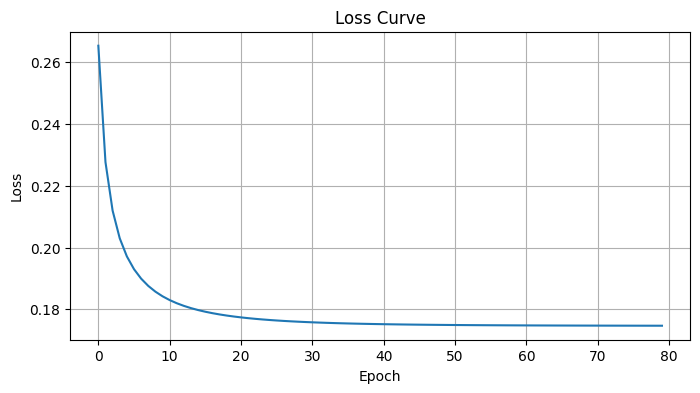

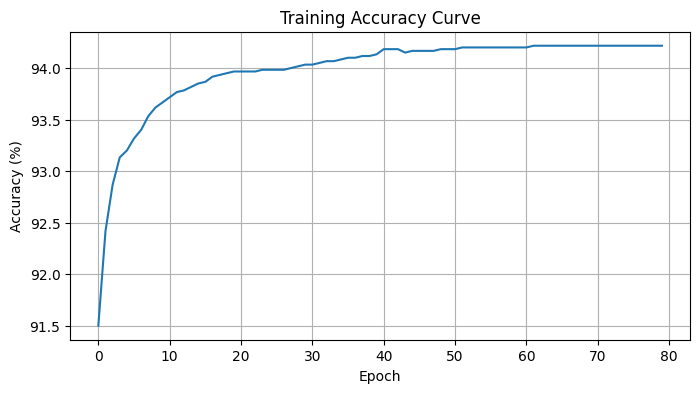

In [12]:
# ------------------------------
# 8. Visualisasi Curve
# ------------------------------
plt.figure(figsize=(8,4))
plt.plot(perceptron.loss_history)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(perceptron.acc_history)
plt.title("Training Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()


In [13]:
def menjalankan_model():

    # ---------------------
    # 1. Load dataset
    # ---------------------
    df_train = pd.read_excel("/content/drive/MyDrive/train_data_eps1.xlsx")
    df_test = pd.read_excel("/content/drive/MyDrive/test_data_ eps1 (1).xlsx")


    # ---------------------
    # 2. Pra-pemrosesan
    # ---------------------
    df_train.fillna(df_train.mean(numeric_only=True), inplace=True)
    df_test.fillna(df_test.mean(numeric_only=True), inplace=True)

    # Identify numerical features only for scaling
    numeric_features = df_train.select_dtypes(include=np.number).columns.drop(df_train.columns[-1])
    target = df_train.columns[-1]

    X_train = df_train[numeric_features].values
    y_train = df_train[target].values.reshape(-1, 1)

    X_test = df_test[numeric_features].values
    y_test = df_test[target].values.reshape(-1, 1)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 3. Chart Data Train vs Test
    plt.figure(figsize=(5,5))
    plt.bar(["Train", "Test"], [len(X_train), len(X_test)])
    plt.title("Perbandingan Jumlah Data Latih vs Uji")
    plt.ylabel("Jumlah Data")
    plt.show()

    # 4. Print Pra-pemrosesan
    print("\n=== Tahap Pra-Pemrosesan Data ===")
    print("• Mengisi missing value: Mean Imputation")
    print(f"• Jumlah fitur dipakai: {len(fitur)} kolom")
    print("• Target:", target)
    print("• Scaling: StandardScaler")
    print("• Teknik Inisialisasi Bobot: Xavier")
    print("• Seed Random Bobot: 123")

    # 5. Tampilkan baris kode model
    print("\n=== Baris Model ===")
    print("""perceptron = SingleLayerPerceptron(
    input_dim=X_train.shape[1],
    learning_rate=0.05,
    init_method="xavier",
    activation="sigmoid",
    seed=123
    )""")

    # 6. Buat Model
    perceptron = SingleLayerPerceptron(
        input_dim=X_train.shape[1],
        learning_rate=0.05,
        init_method="xavier",
        activation="sigmoid",
        seed=123
    )

    perceptron.train(X_train, y_train)

    # 7. Evaluasi
    print("\nAkurasi Train:", perceptron.evaluate(X_train, y_train))
    print("Akurasi Test:", perceptron.evaluate(X_test, y_test))

    # 8. Visualisasi Loss & Akurasi
    plt.figure(figsize=(8,4))
    plt.plot(perceptron.loss_history)
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

    plt.figure(figsize=(8,4))
    plt.plot(perceptron.acc_history)
    plt.title("Training Accuracy Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.grid()
    plt.show()

In [14]:
def eksperimen_otomatis():

    df_train = pd.read_excel("/content/drive/MyDrive/train_data_eps1.xlsx")
    df_test = pd.read_excel("/content/drive/MyDrive/test_data_ eps1 (1).xlsx")

    df_train.fillna(df_train.mean(numeric_only=True), inplace=True)
    df_test.fillna(df_test.mean(numeric_only=True), inplace=True)

    # Select only numeric features for scaling
    numeric_features = df_train.select_dtypes(include=np.number).columns.drop(df_train.columns[-1])
    target = df_train.columns[-1]

    learning_rates = [0.001, 0.01, 0.05, 0.1]
    activations = ["sigmoid", "relu"]
    jumlah_fitur = list(range(1, len(numeric_features)+1)) # Iterate based on numeric features

    hasil = []

    for lr in learning_rates:
        for act in activations:
            for jml in jumlah_fitur:

                fitur_dipakai = numeric_features[:jml] # Use numeric_features

                # Initialize and fit scaler for the current subset of features
                scaler_subset = StandardScaler()
                X_train = scaler_subset.fit_transform(df_train[fitur_dipakai])
                y_train = df_train[target].values.reshape(-1, 1)

                X_test = scaler_subset.transform(df_test[fitur_dipakai])
                y_test = df_test[target].values.reshape(-1, 1)

                model = SingleLayerPerceptron(
                    input_dim=jml,
                    learning_rate=lr,
                    init_method="xavier",
                    activation=act,
                    seed=123
                )

                model.train(X_train, y_train)

                acc_train = model.evaluate(X_train, y_train)
                acc_test = model.evaluate(X_test, y_test)

                hasil.append([lr, act, jml, acc_train, acc_test])

                print(f"LR={lr}, Act={act}, Fitur={jml} → Train={acc_train:.2f}% | Test={acc_test:.2f}%")

    df_hasil = pd.DataFrame(hasil, columns=[
        "Learning Rate", "Activation Function", "Jumlah Fitur",
        "Akurasi Train (%)", "Akurasi Test (%)"
    ])

    print("\n=== HASIL EKSPERIMEN LENGKAP ===")
    print(df_hasil)

    return df_hasil

In [ ]:
# ==============================
# RUN PROGRAM
# ==============================
hasil_eksperimen = eksperimen_otomatis()

LR=0.001, Act=sigmoid, Fitur=1 → Train=59.77% | Test=59.77%
LR=0.001, Act=sigmoid, Fitur=2 → Train=82.40% | Test=81.27%
LR=0.001, Act=sigmoid, Fitur=3 → Train=90.10% | Test=89.68%
LR=0.001, Act=sigmoid, Fitur=4 → Train=91.95% | Test=92.45%
LR=0.001, Act=sigmoid, Fitur=5 → Train=92.00% | Test=92.25%
LR=0.001, Act=sigmoid, Fitur=6 → Train=91.98% | Test=92.17%
LR=0.001, Act=sigmoid, Fitur=7 → Train=92.05% | Test=92.20%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.001, Act=relu, Fitur=1 → Train=59.77% | Test=59.77%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.001, Act=relu, Fitur=2 → Train=83.65% | Test=81.97%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.001, Act=relu, Fitur=3 → Train=90.38% | Test=89.92%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.001, Act=relu, Fitur=4 → Train=93.87% | Test=93.58%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.001, Act=relu, Fitur=5 → Train=93.85% | Test=93.45%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.001, Act=relu, Fitur=6 → Train=93.75% | Test=93.38%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.001, Act=relu, Fitur=7 → Train=94.03% | Test=93.47%
LR=0.01, Act=sigmoid, Fitur=1 → Train=59.77% | Test=59.77%
LR=0.01, Act=sigmoid, Fitur=2 → Train=83.63% | Test=82.00%
LR=0.01, Act=sigmoid, Fitur=3 → Train=90.67% | Test=90.33%
LR=0.01, Act=sigmoid, Fitur=4 → Train=93.62% | Test=93.50%
LR=0.01, Act=sigmoid, Fitur=5 → Train=93.63% | Test=93.53%
LR=0.01, Act=sigmoid, Fitur=6 → Train=93.70% | Test=93.62%
LR=0.01, Act=sigmoid, Fitur=7 → Train=93.88% | Test=93.75%
LR=0.01, Act=relu, Fitur=1 → Train=59.77% | Test=59.77%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.01, Act=relu, Fitur=2 → Train=82.88% | Test=81.70%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.01, Act=relu, Fitur=3 → Train=90.83% | Test=90.30%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.01, Act=relu, Fitur=4 → Train=93.73% | Test=93.42%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.01, Act=relu, Fitur=5 → Train=93.75% | Test=93.38%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.01, Act=relu, Fitur=6 → Train=93.75% | Test=93.38%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.01, Act=relu, Fitur=7 → Train=94.00% | Test=93.47%
LR=0.05, Act=sigmoid, Fitur=1 → Train=59.77% | Test=59.77%
LR=0.05, Act=sigmoid, Fitur=2 → Train=83.62% | Test=81.97%
LR=0.05, Act=sigmoid, Fitur=3 → Train=90.52% | Test=90.22%
LR=0.05, Act=sigmoid, Fitur=4 → Train=93.97% | Test=93.62%
LR=0.05, Act=sigmoid, Fitur=5 → Train=93.95% | Test=93.58%
LR=0.05, Act=sigmoid, Fitur=6 → Train=93.95% | Test=93.67%
LR=0.05, Act=sigmoid, Fitur=7 → Train=94.22% | Test=93.75%
LR=0.05, Act=relu, Fitur=1 → Train=59.77% | Test=59.77%
LR=0.05, Act=relu, Fitur=2 → Train=83.00% | Test=81.75%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.05, Act=relu, Fitur=3 → Train=90.80% | Test=90.33%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.05, Act=relu, Fitur=4 → Train=93.70% | Test=93.42%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.05, Act=relu, Fitur=5 → Train=93.70% | Test=93.42%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.05, Act=relu, Fitur=6 → Train=93.77% | Test=93.47%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.05, Act=relu, Fitur=7 → Train=94.02% | Test=93.60%
LR=0.1, Act=sigmoid, Fitur=1 → Train=59.77% | Test=59.77%
LR=0.1, Act=sigmoid, Fitur=2 → Train=83.57% | Test=81.77%
LR=0.1, Act=sigmoid, Fitur=3 → Train=90.55% | Test=90.18%
LR=0.1, Act=sigmoid, Fitur=4 → Train=93.93% | Test=93.67%
LR=0.1, Act=sigmoid, Fitur=5 → Train=94.03% | Test=93.73%
LR=0.1, Act=sigmoid, Fitur=6 → Train=94.03% | Test=93.67%
LR=0.1, Act=sigmoid, Fitur=7 → Train=94.23% | Test=93.75%
LR=0.1, Act=relu, Fitur=1 → Train=59.77% | Test=59.77%
LR=0.1, Act=relu, Fitur=2 → Train=83.30% | Test=81.88%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.1, Act=relu, Fitur=3 → Train=90.75% | Test=90.35%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.1, Act=relu, Fitur=4 → Train=93.78% | Test=93.47%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.1, Act=relu, Fitur=5 → Train=93.73% | Test=93.50%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.1, Act=relu, Fitur=6 → Train=93.77% | Test=93.55%


/tmp/ipython-input-368009648.py:66: RuntimeWarning: invalid value encountered in log
  (1 - y) * np.log(1 - out + 1e-8)


LR=0.1, Act=relu, Fitur=7 → Train=93.98% | Test=93.65%

=== HASIL EKSPERIMEN LENGKAP ===
    Learning Rate Activation Function  Jumlah Fitur  Akurasi Train (%)  \
0           0.001             sigmoid             1          59.766667   
1           0.001             sigmoid             2          82.400000   
2           0.001             sigmoid             3          90.100000   
3           0.001             sigmoid             4          91.950000   
4           0.001             sigmoid             5          92.000000   
5           0.001             sigmoid             6          91.983333   
6           0.001             sigmoid             7          92.050000   
7           0.001                relu             1          59.766667   
8           0.001                relu             2          83.650000   
9           0.001                relu             3          90.383333   
10          0.001                relu             4          93.866667   
11          0.001      

In [16]:
print("Total kolom fitur (X):", len(numeric_features))
print("Nama kolom fitur:", list(numeric_features))
print("Nama kolom target:", target)


Total kolom fitur (X): 7
Nama kolom fitur: ['no', 'followers_count', 'friends_count', 'post_count', 'default_profile_image', 'profile_use_background_image', 'verified']
Nama kolom target: fake
